# INM706 - Deep Learning for Sequence Analysis

Authors: Laerte Adami - Elisa Troschka

Source: 
- https://towardsdatascience.com/a-comprehensive-guide-to-neural-machine-translation-using-seq2sequence-modelling-using-pytorch-41c9b84ba350#30b6
- https://pytorch.org/tutorials/intermediate/seq2seq_translation_tutorial.html#evaluation

In [1]:
import time
from Utilities.lstmHandler import EncoderLSTM, DecoderLSTM
from Utilities.modelHandler import LSTModel
from Utilities.LanguageDataset import LanguageDataset, my_collate_fn
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
from torch.nn import CrossEntropyLoss as CEL
from torch.optim import Adam

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device = torch.device("cpu")

plt.rcParams['font.size'] = 17

## Dataset

In [2]:
### USANDO SOLO 500 RIGHE DEL DATASET ###

In [18]:
start_token = '<BoS>'
end_token = '<EoS>'

dataset = LanguageDataset(data_path="Data/eng_ita.tsv", start_token = start_token, end_token = end_token)

embedding_size = 256

loss_func = CEL()

end_index = dataset.from_ita[end_token]
start_index = dataset.from_ita[start_token]

trainloader = DataLoader(dataset, batch_size = 100, collate_fn = my_collate_fn)

print("English vocabulary size: {}".format(dataset.eng_voc_size))
print("Italian vocabulary size: {}".format(dataset.ita_voc_size))

English vocabulary size: 582
Italian vocabulary size: 821


## Model

In [4]:
exp_name = "TEST"
results_path = "Results"

In [5]:
encoder = EncoderLSTM(vocabulary_size = dataset.eng_voc_size,
                     embedding_size = embedding_size,
                     num_layers = 1, 
                     bidirectional = False)

decoder = DecoderLSTM(vocabulary_size = dataset.ita_voc_size,
                     embedding_size = embedding_size,
                     num_layers = 1, 
                     bidirectional = False)

In [6]:
model = LSTModel(encoder = encoder, 
                 decoder = decoder, 
                 encoder_optimizer = Adam(encoder.parameters()), 
                 decoder_optimizer = Adam(decoder.parameters()),
                 loss_function = loss_func, 
                 eos_token = end_index, 
                 bos_token = start_index)

## Training

Completed epoch: 1, loss: 10.533
Completed epoch: 2, loss: 10.082
Completed epoch: 3, loss: 9.842
Completed epoch: 4, loss: 9.648
Completed epoch: 5, loss: 8.786
Completed epoch: 6, loss: 8.358
Completed epoch: 7, loss: 7.583
Completed epoch: 8, loss: 7.247
Completed epoch: 9, loss: 7.029
Completed epoch: 10, loss: 6.208
Completed epoch: 11, loss: 5.813
Completed epoch: 12, loss: 5.127
Completed epoch: 13, loss: 4.821
Completed epoch: 14, loss: 4.776
Completed epoch: 15, loss: 4.544
Completed epoch: 16, loss: 4.45
Completed epoch: 17, loss: 3.918
Completed epoch: 18, loss: 3.684
Completed epoch: 19, loss: 3.58
Completed epoch: 20, loss: 3.506
Completed epoch: 21, loss: 3.565
Completed epoch: 22, loss: 3.284
Completed epoch: 23, loss: 3.192
Completed epoch: 24, loss: 3.091
Completed epoch: 25, loss: 3.009
Completed epoch: 26, loss: 2.943
Completed epoch: 27, loss: 2.846
Completed epoch: 28, loss: 2.882
Completed epoch: 29, loss: 2.849
Completed epoch: 30, loss: 2.862
-------------------

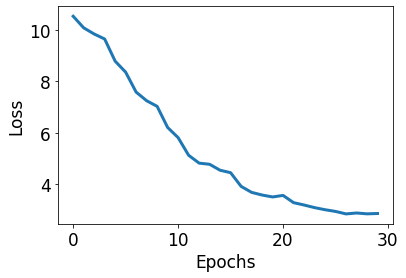

In [7]:
start_time = time.time()
L = model.train_model(trainloader, 
                  max_epochs = 30,
                  save_every_epochs = 20,
                  ckp_name = 'test')
print("--------------------------------")
print("Time required: {}".format(time.time()-start_time))
      
fig, ax = plt.subplots()
ax.plot(L, linewidth = 3)
ax.set_xlabel("Epochs")
ax.set_ylabel("Loss");
plt.savefig(results_path+"/training_loss.png")

In [19]:
result = model.evaluate_model(trainloader, max_length=20)# enc_ckp = "test_enc_10.pth", dec_ckp="test_dec_10.pth")

In [22]:
sent = result[67]
print("English: " + dataset.translate(sent[0],'eng'))
print("Italian: " + dataset.translate(sent[1],'ita'))
print("Translation: " + dataset.translate(sent[2],'ita'))

English:  <BoS> You should sleep <EoS>
Italian:  <BoS> Dovrebbe dormire <EoS>
Translation:  <BoS> Dovresti dormire <EoS>


In [23]:
sent = result[34]
print("English: " + dataset.translate(sent[0],'eng'))
print("Italian: " + dataset.translate(sent[1],'ita'))
print("Translation: " + dataset.translate(sent[2],'ita'))

English:  <BoS> You re in better shape than I am <EoS>
Italian:  <BoS> Tu sei più in forma di me <EoS>
Translation:  <BoS> Voi più in in di me <EoS>
